In [9]:
pip install scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [11]:
csv_url = r"C:\Users\GIA BAO\OneDrive - Trường ĐH CNTT - University of Information Technology\VCB-doan.csv"

In [12]:
df = pd.read_csv(csv_url, delimiter=';')
print(df)

            Date  Close   Open   High    Low    Vol  Change
0     07/12/2017  36089  36392  36392  35407  3.49M  -0.83%
1     08/12/2017  35672  36089  36089  35255  1.94M  -1.16%
2     11/12/2017  33815  34876  35558  33815  1.85M  -5.21%
3     12/12/2017  33891  34345  34421  31540  3.11M   0.22%
4     13/12/2017  33360  34118  34194  33132  1.50M  -1.57%
...          ...    ...    ...    ...    ...    ...     ...
1504  15/12/2023  82200  84000  84400  82200  2.53M  -2.61%
1505  18/12/2023  81500  82800  82900  81500  1.80M  -0.85%
1506  19/12/2023  81200  81500  81500  80100  1.96M  -0.37%
1507  20/12/2023  81100  81200  81300  80500  1.87M  -0.12%
1508  21/12/2023  80900  81000  81000  80300  2.03M  -0.25%

[1509 rows x 7 columns]


In [13]:
# Convert the 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [14]:
# Convert the data type of the 'Vol' and 'Change' columns
df['Vol'] = df['Vol'].str.replace('M', '').str.replace('K', '').astype(float)  # Convert 'M' to million and change the data type to float
df['Change'] = df['Change'].str.rstrip('%').astype(float) / 100.0  # Convert percentage to decimal number
print(df)

            Close   Open   High    Low   Vol  Change
Date                                                
2017-12-07  36089  36392  36392  35407  3.49 -0.0083
2017-12-08  35672  36089  36089  35255  1.94 -0.0116
2017-12-11  33815  34876  35558  33815  1.85 -0.0521
2017-12-12  33891  34345  34421  31540  3.11  0.0022
2017-12-13  33360  34118  34194  33132  1.50 -0.0157
...           ...    ...    ...    ...   ...     ...
2023-12-15  82200  84000  84400  82200  2.53 -0.0261
2023-12-18  81500  82800  82900  81500  1.80 -0.0085
2023-12-19  81200  81500  81500  80100  1.96 -0.0037
2023-12-20  81100  81200  81300  80500  1.87 -0.0012
2023-12-21  80900  81000  81000  80300  2.03 -0.0025

[1509 rows x 6 columns]


In [15]:
# Identify features and target variables
features = ['Open', 'High', 'Low', 'Vol']
target = 'Close'

Train-Test-Val Ratio: 7:2:1
Test RMSE: 2866.9567085039616
Test MAE: 1565.530830564783
Test MAPE: 1.66
------------------------------


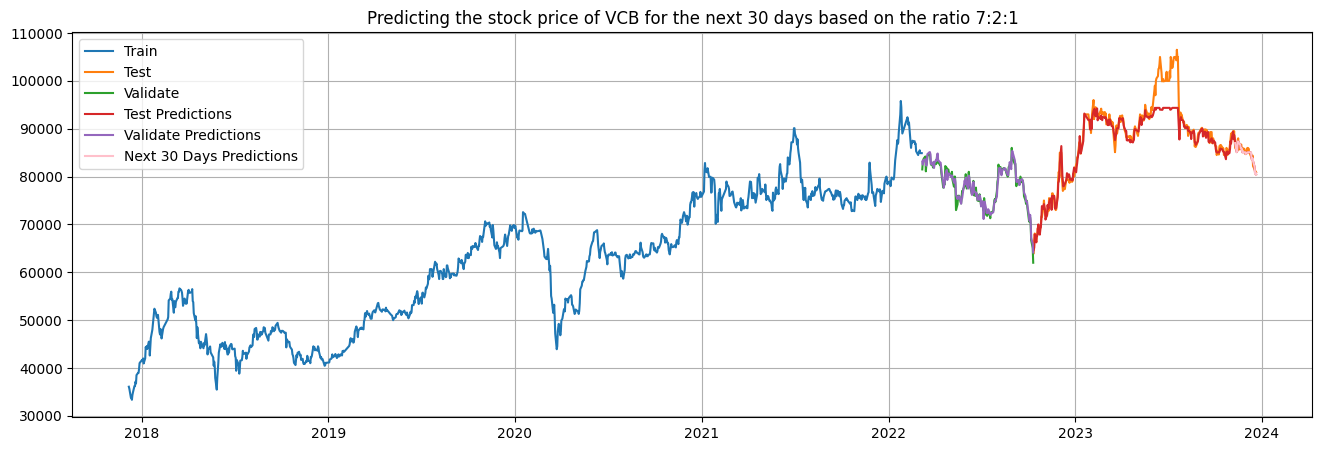

Train-Test-Val Ratio: 6:3:1
Test RMSE: 3782.8084689654834
Test MAE: 1951.008672566371
Test MAPE: 2.09
------------------------------


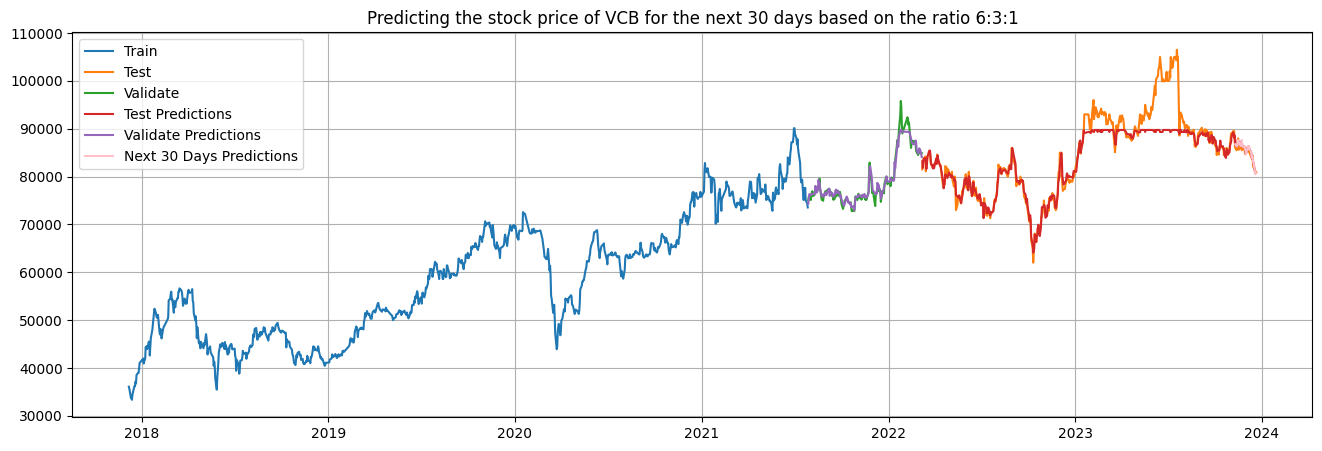

Train-Test-Val Ratio: 5:3:2
Test RMSE: 12153.241440145117
Test MAE: 9574.709115044247
Test MAPE: 10.58
------------------------------


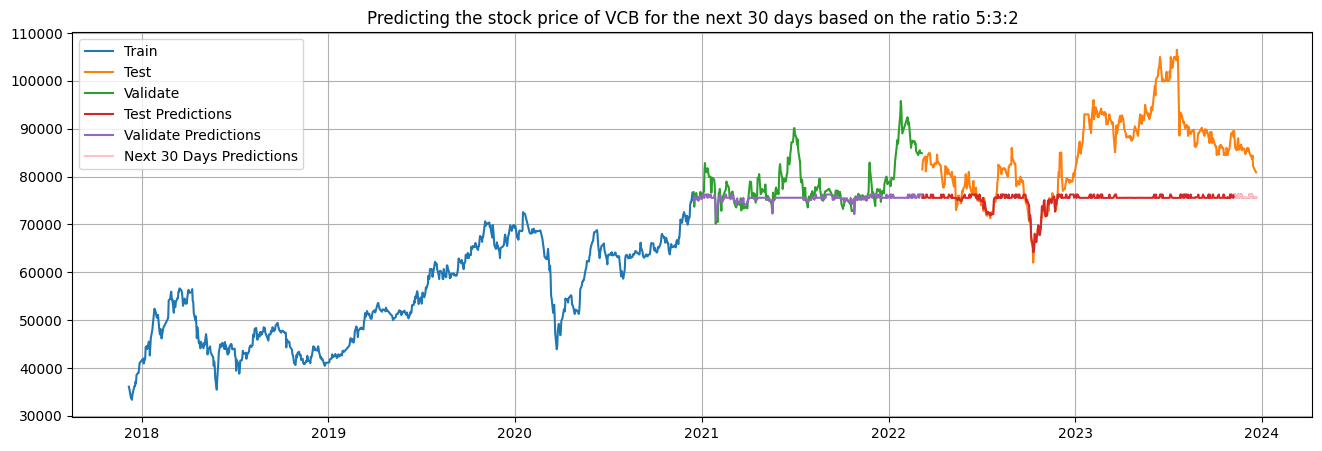

In [19]:
import matplotlib.pyplot as plt
# Initialize lists to store predictions for each ratio
all_train_predictions = []
all_test_predictions = []
all_val_predictions = []

# Drawing plots for all three ratios
ratios = [(7, 2, 1), (6, 3, 1), (5, 3, 2)]

for train_ratio, test_ratio, val_ratio in ratios:
    # Split the data into training, testing, and validation sets
    train_size = int(len(df) * train_ratio / (train_ratio + test_ratio + val_ratio))
    test_size = int(len(df) * test_ratio / (train_ratio + test_ratio + val_ratio))

    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
    train_data, val_data = train_test_split(train_data, test_size=val_ratio / (train_ratio + val_ratio), shuffle=False)

    # Build a Random Forest model
    model = RandomForestRegressor()

    # Train the model
    model.fit(train_data[features], train_data[target])

    # Predict on the training, testing, and validation sets
    train_predictions = model.predict(train_data[features])
    test_predictions = model.predict(test_data[features])
    val_predictions = model.predict(val_data[features])

    # Save predictions for each ratio
    all_train_predictions.append(train_predictions)
    all_test_predictions.append(test_predictions)
    all_val_predictions.append(val_predictions)

    # Calculate evaluation metrics for the testing set
    test_rmse = np.sqrt(mean_squared_error(test_data[target], test_predictions))
    test_mae = mean_absolute_error(test_data[target], test_predictions)
    test_mape = np.mean(np.abs((test_data[target] - test_predictions) / test_data[target])) * 100

    # Calculate evaluation metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(train_data[target], train_predictions))
    train_mae = mean_absolute_error(train_data[target], train_predictions)
    train_mape = np.mean(np.abs((train_data[target] - train_predictions) / train_data[target])) * 100

    # Calculate evaluation metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(val_data[target], val_predictions))
    val_mae = mean_absolute_error(val_data[target], val_predictions)
    val_mape = np.mean(np.abs((val_data[target] - val_predictions) / val_data[target])) * 100

    # Print result for each ratio
    print(f'Train-Test-Val Ratio: {train_ratio}:{test_ratio}:{val_ratio}')
    print(f'Test RMSE: {test_rmse}')
    print(f'Test MAE: {test_mae}')
    print(f'Test MAPE: {test_mape:.2f}')
    print('-' * 30)

    # Plotting for each ratio
    last_data = df.index[-30:]
    y_pred_test = model.predict(df.loc[last_data][features])

    plt.figure(figsize=(16, 5))
    plt.title(f"Predicting the stock price of VCB for the next 30 days based on the ratio {train_ratio}:{test_ratio}:{val_ratio}")
    plt.grid(True)
    plt.plot(train_data.index, train_data['Close'])
    plt.plot(test_data.index, test_data['Close'])
    plt.plot(val_data.index, val_data['Close'])
    plt.plot(test_data.index, test_predictions)
    plt.plot(val_data.index, val_predictions)
    plt.plot(last_data, y_pred_test, color="pink")
    plt.legend(['Train', 'Test', 'Validate', 'Test Predictions', 'Validate Predictions', 'Next 30 Days Predictions'])
    plt.show()